In [158]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [159]:
os.listdir()

['.ipynb_checkpoints',
 'Problem Statement_RandomForest.pdf',
 'RandomForest(17_08_2021).ipynb',
 'TaxiFare.csv',
 'Taxi_Fare.ipynb']

In [160]:
tx = pd.read_csv('TaxiFare.csv')

In [161]:
tx.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [162]:
tx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
unique_id               50000 non-null object
amount                  50000 non-null float64
date_time_of_pickup     50000 non-null object
longitude_of_pickup     50000 non-null float64
latitude_of_pickup      50000 non-null float64
longitude_of_dropoff    50000 non-null float64
latitude_of_dropoff     50000 non-null float64
no_of_passenger         50000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


 No Null Value present in the dataset.

In [163]:
tx.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,50000.0,11.364171,9.685557,-5.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.542400,46.500000,52.000000,200.000000
longitude_of_pickup,50000.0,-72.509756,10.393860,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006817,-74.002780,-73.992062,-73.985838,-73.981840,-73.967148,-73.950992,-73.871328,-73.862868,-73.137393,0.000000,40.783472
latitude_of_pickup,50000.0,39.933759,6.224857,-74.006893,0.000000,40.580091,40.645435,40.681082,40.702122,40.717982,40.734880,40.746850,40.752678,40.767360,40.779783,40.787807,40.790638,40.799648,40.807126,401.083332
longitude_of_dropoff,50000.0,-72.504616,10.407570,-84.654241,-74.015120,-74.011755,-74.009843,-74.008285,-74.007277,-74.002711,-73.991152,-73.984217,-73.980082,-73.963584,-73.944730,-73.873277,-73.864097,-73.423068,0.000000,40.851027
latitude_of_dropoff,50000.0,39.926251,6.014737,-74.006377,0.000000,40.564511,40.646878,40.672732,40.686028,40.713276,40.734371,40.747607,40.753372,40.768167,40.782902,40.794087,40.798816,40.810248,40.832502,43.415190
no_of_passenger,50000.0,1.667840,1.289195,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000


In [164]:
# tx["date_time_of_pickup"].value_counts()

In [165]:
tx["amount"].describe() 

count    50000.000000
mean        11.364171
std          9.685557
min         -5.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        200.000000
Name: amount, dtype: float64

In [166]:
index_names = tx[tx["amount"]<0].index

In [167]:
tx.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [168]:
tx["X1"] = tx["latitude_of_pickup"]
tx["X2"] = tx["latitude_of_dropoff"]
tx["Y1"] = tx["longitude_of_pickup"]
tx["Y2"] = tx["longitude_of_dropoff"]

In [169]:
tx.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,X1,X2,Y1,Y2
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,40.721319,40.712278,-73.844311,-73.841610
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,40.711303,40.782004,-74.016048,-73.979268
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,40.761270,40.750562,-73.982738,-73.991242
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,40.733143,40.758092,-73.987130,-73.991567
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,40.768008,40.783762,-73.968095,-73.956655


#### Outlier  Treatment

In [170]:
# tx[tx["amount"]>=52]=52

In [171]:
tx.drop(index_names,inplace=True)

In [172]:
tx.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49994.0,11.365903,9.684843,0.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.556800,46.500000,52.000000,200.000000
longitude_of_pickup,49994.0,-72.509586,10.394472,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006818,-74.002782,-73.992062,-73.985838,-73.981840,-73.967153,-73.950994,-73.871349,-73.862870,-73.137393,0.000000,40.783472
latitude_of_pickup,49994.0,39.933665,6.225225,-74.006893,0.000000,40.579150,40.645444,40.681112,40.702133,40.717984,40.734883,40.746854,40.752679,40.767361,40.779783,40.787804,40.790641,40.799649,40.807128,401.083332
longitude_of_dropoff,49994.0,-72.505922,10.403131,-84.654241,-74.015120,-74.011756,-74.009844,-74.008286,-74.007278,-74.002712,-73.991152,-73.984218,-73.980082,-73.963585,-73.944741,-73.873281,-73.864206,-73.435587,0.000000,40.851027
latitude_of_dropoff,49994.0,39.926970,6.012441,-74.006377,0.000000,40.570296,40.646891,40.672769,40.686087,40.713278,40.734375,40.747608,40.753373,40.768167,40.782902,40.794092,40.798821,40.810249,40.832503,43.415190
no_of_passenger,49994.0,1.667860,1.289213,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000
X1,49994.0,39.933665,6.225225,-74.006893,0.000000,40.579150,40.645444,40.681112,40.702133,40.717984,40.734883,40.746854,40.752679,40.767361,40.779783,40.787804,40.790641,40.799649,40.807128,401.083332
X2,49994.0,39.926970,6.012441,-74.006377,0.000000,40.570296,40.646891,40.672769,40.686087,40.713278,40.734375,40.747608,40.753373,40.768167,40.782902,40.794092,40.798821,40.810249,40.832503,43.415190
Y1,49994.0,-72.509586,10.394472,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006818,-74.002782,-73.992062,-73.985838,-73.981840,-73.967153,-73.950994,-73.871349,-73.862870,-73.137393,0.000000,40.783472
Y2,49994.0,-72.505922,10.403131,-84.654241,-74.015120,-74.011756,-74.009844,-74.008286,-74.007278,-74.002712,-73.991152,-73.984218,-73.980082,-73.963585,-73.944741,-73.873281,-73.864206,-73.435587,0.000000,40.851027


In [173]:
index_names

Int64Index([2039, 2486, 13032, 28839, 36722, 42337], dtype='int64')

In [174]:
tx["Distance_Travel"] = np.sqrt((np.square(tx["X1"]-tx["X2"]))+(np.square(tx["Y1"]-tx["Y2"])))

In [175]:
# tx[tx["Distance_Travel"]>=0.20577]=0.20577

In [176]:
tx1=tx.drop(columns=["longitude_of_pickup","latitude_of_pickup","longitude_of_dropoff","latitude_of_dropoff"])

In [177]:
tx1.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49994.0,11.365903,9.684843,0.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.556800,46.500000,52.000000,200.000000
no_of_passenger,49994.0,1.667860,1.289213,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000
X1,49994.0,39.933665,6.225225,-74.006893,0.000000,40.579150,40.645444,40.681112,40.702133,40.717984,40.734883,40.746854,40.752679,40.767361,40.779783,40.787804,40.790641,40.799649,40.807128,401.083332
X2,49994.0,39.926970,6.012441,-74.006377,0.000000,40.570296,40.646891,40.672769,40.686087,40.713278,40.734375,40.747608,40.753373,40.768167,40.782902,40.794092,40.798821,40.810249,40.832503,43.415190
Y1,49994.0,-72.509586,10.394472,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006818,-74.002782,-73.992062,-73.985838,-73.981840,-73.967153,-73.950994,-73.871349,-73.862870,-73.137393,0.000000,40.783472
Y2,49994.0,-72.505922,10.403131,-84.654241,-74.015120,-74.011756,-74.009844,-74.008286,-74.007278,-74.002712,-73.991152,-73.984218,-73.980082,-73.963585,-73.944741,-73.873281,-73.864206,-73.435587,0.000000,40.851027
Distance_Travel,49994.0,0.189561,3.838829,0.000000,0.000000,0.000000,0.000018,0.002756,0.004367,0.007358,0.012474,0.017532,0.021501,0.038676,0.070265,0.112406,0.122441,0.195027,0.228218,360.304405


In [178]:
# tx1[tx1["Distance_Travel"]>=0.228218]=0.228218

In [179]:
tx1.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49994.0,11.365903,9.684843,0.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.556800,46.500000,52.000000,200.000000
no_of_passenger,49994.0,1.667860,1.289213,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000
X1,49994.0,39.933665,6.225225,-74.006893,0.000000,40.579150,40.645444,40.681112,40.702133,40.717984,40.734883,40.746854,40.752679,40.767361,40.779783,40.787804,40.790641,40.799649,40.807128,401.083332
X2,49994.0,39.926970,6.012441,-74.006377,0.000000,40.570296,40.646891,40.672769,40.686087,40.713278,40.734375,40.747608,40.753373,40.768167,40.782902,40.794092,40.798821,40.810249,40.832503,43.415190
Y1,49994.0,-72.509586,10.394472,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006818,-74.002782,-73.992062,-73.985838,-73.981840,-73.967153,-73.950994,-73.871349,-73.862870,-73.137393,0.000000,40.783472
Y2,49994.0,-72.505922,10.403131,-84.654241,-74.015120,-74.011756,-74.009844,-74.008286,-74.007278,-74.002712,-73.991152,-73.984218,-73.980082,-73.963585,-73.944741,-73.873281,-73.864206,-73.435587,0.000000,40.851027
Distance_Travel,49994.0,0.189561,3.838829,0.000000,0.000000,0.000000,0.000018,0.002756,0.004367,0.007358,0.012474,0.017532,0.021501,0.038676,0.070265,0.112406,0.122441,0.195027,0.228218,360.304405


In [180]:
# taxi1_piv=taxi1.pivot_table(index="pickup_day",columns='pickup_time_of_day',values='pickup_day_no',aggfunc='count')

# taxi1_piv.plot(kind='bar',figsize=(10,7),width=.5)
# plt.show()


In [181]:
tx1.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470


In [182]:
# tx1["date_time_of_pickup"] = pd.to_datetime(tx["date_time_of_pickup"])

In [183]:
tx1[["date","Time","Zone"]]=tx1["date_time_of_pickup"].str.split(pat=" ",n=-1 , expand=True)


In [184]:
tx1.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC


In [185]:
# tx2 = tx1.drop(columns=["X1","X2","Y1","Y2"])
tx2 = tx1.copy()

In [186]:
tx2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC


In [187]:
tx2.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49994.0,11.365903,9.684843,0.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.556800,46.500000,52.000000,200.000000
no_of_passenger,49994.0,1.667860,1.289213,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,5.000000,5.000000,5.000000,6.000000,6.000000
X1,49994.0,39.933665,6.225225,-74.006893,0.000000,40.579150,40.645444,40.681112,40.702133,40.717984,40.734883,40.746854,40.752679,40.767361,40.779783,40.787804,40.790641,40.799649,40.807128,401.083332
X2,49994.0,39.926970,6.012441,-74.006377,0.000000,40.570296,40.646891,40.672769,40.686087,40.713278,40.734375,40.747608,40.753373,40.768167,40.782902,40.794092,40.798821,40.810249,40.832503,43.415190
Y1,49994.0,-72.509586,10.394472,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006818,-74.002782,-73.992062,-73.985838,-73.981840,-73.967153,-73.950994,-73.871349,-73.862870,-73.137393,0.000000,40.783472
Y2,49994.0,-72.505922,10.403131,-84.654241,-74.015120,-74.011756,-74.009844,-74.008286,-74.007278,-74.002712,-73.991152,-73.984218,-73.980082,-73.963585,-73.944741,-73.873281,-73.864206,-73.435587,0.000000,40.851027
Distance_Travel,49994.0,0.189561,3.838829,0.000000,0.000000,0.000000,0.000018,0.002756,0.004367,0.007358,0.012474,0.017532,0.021501,0.038676,0.070265,0.112406,0.122441,0.195027,0.228218,360.304405


In [188]:
# tx2[tx2["amount"]>=52]=52
# tx2[tx2["no_of_passenger"]>=6]=4
# tx2[tx2["no_of_passenger"]<=1]=1
# tx2[tx2["Distance_Travel"]>=0.228218]=0.228218

In [189]:
tx2["amount"] = np.where(tx2["amount"]>=52, 52, tx2["amount"])
tx2["no_of_passenger"] = np.where(tx2["no_of_passenger"]>=5, 4, tx2["no_of_passenger"])
tx2["Distance_Travel"] = np.where(tx2["Distance_Travel"]>=0.228218, 0.228218, tx2["Distance_Travel"])

In [190]:
tx2.describe(percentiles = [0.01,.02,.03,.04,.05,.1,.25,.4,.5,.75,.9,.95,.96,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,40%,50%,75%,90%,95%,96%,98%,99%,max
amount,49994.0,11.254556,8.976195,0.000000,3.300000,3.500000,3.700000,4.000000,4.100000,4.500000,6.000000,7.300000,8.500000,12.500000,20.500000,30.500000,33.556800,46.500000,52.000000,52.000000
no_of_passenger,49994.0,1.559227,0.997678,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
X1,49994.0,39.933665,6.225225,-74.006893,0.000000,40.579150,40.645444,40.681112,40.702133,40.717984,40.734883,40.746854,40.752679,40.767361,40.779783,40.787804,40.790641,40.799649,40.807128,401.083332
X2,49994.0,39.926970,6.012441,-74.006377,0.000000,40.570296,40.646891,40.672769,40.686087,40.713278,40.734375,40.747608,40.753373,40.768167,40.782902,40.794092,40.798821,40.810249,40.832503,43.415190
Y1,49994.0,-72.509586,10.394472,-75.423848,-74.014444,-74.010458,-74.008735,-74.007743,-74.006818,-74.002782,-73.992062,-73.985838,-73.981840,-73.967153,-73.950994,-73.871349,-73.862870,-73.137393,0.000000,40.783472
Y2,49994.0,-72.505922,10.403131,-84.654241,-74.015120,-74.011756,-74.009844,-74.008286,-74.007278,-74.002712,-73.991152,-73.984218,-73.980082,-73.963585,-73.944741,-73.873281,-73.864206,-73.435587,0.000000,40.851027
Distance_Travel,49994.0,0.033873,0.039055,0.000000,0.000000,0.000000,0.000018,0.002756,0.004367,0.007358,0.012474,0.017532,0.021501,0.038676,0.070265,0.112406,0.122441,0.195027,0.228217,0.228218


In [191]:
tx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 12 columns):
unique_id              49994 non-null object
amount                 49994 non-null float64
date_time_of_pickup    49994 non-null object
no_of_passenger        49994 non-null int64
X1                     49994 non-null float64
X2                     49994 non-null float64
Y1                     49994 non-null float64
Y2                     49994 non-null float64
Distance_Travel        49994 non-null float64
date                   49994 non-null object
Time                   49994 non-null object
Zone                   49994 non-null object
dtypes: float64(6), int64(1), object(5)
memory usage: 5.0+ MB


In [192]:
tx2["date"] = pd.to_datetime(tx2["date"])
tx2["date_time_of_pickup"] = pd.to_datetime(tx2["date_time_of_pickup"])


In [193]:
tx2["hours"] = tx2["date_time_of_pickup"].dt.hour
tx2["min"] = tx2["date_time_of_pickup"].dt.minute
tx2["second"] = tx2["date_time_of_pickup"].dt.second

In [194]:
tx2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone,hours,min,second
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0


In [195]:
tx2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49994 entries, 0 to 49999
Data columns (total 15 columns):
unique_id              49994 non-null object
amount                 49994 non-null float64
date_time_of_pickup    49994 non-null datetime64[ns, UTC]
no_of_passenger        49994 non-null int64
X1                     49994 non-null float64
X2                     49994 non-null float64
Y1                     49994 non-null float64
Y2                     49994 non-null float64
Distance_Travel        49994 non-null float64
date                   49994 non-null datetime64[ns]
Time                   49994 non-null object
Zone                   49994 non-null object
hours                  49994 non-null int64
min                    49994 non-null int64
second                 49994 non-null int64
dtypes: datetime64[ns, UTC](1), datetime64[ns](1), float64(6), int64(4), object(3)
memory usage: 6.1+ MB


In [196]:
def time_of_day(x):
    if x in range(6,12):
        return "Morning"
    elif x in range(12,17):
        return "Afternoon"
    elif x in range(17,21):
        return "Evening"
    else:
        return "Night"

In [197]:
tx2["time_of_day"] = tx2["hours"].apply(time_of_day)

In [198]:
tx2.head()


,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone,hours,min,second,time_of_day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,Evening
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,Afternoon
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,Night
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,Night
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0,Morning


In [199]:
# what to do with distance travel == 0
# Latitude and Longitude ==0 meaning what and what to do?


In [200]:
tx2["day"] = tx2["date_time_of_pickup"].dt.day_name()
tx2["day_no"] = tx2["date_time_of_pickup"].dt.weekday

In [201]:
# tx2.drop(columns=["date_time_of_pickup"],inplace = True)

In [202]:
tx2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone,hours,min,second,time_of_day,day,day_no
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,Evening,Monday,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,Afternoon,Tuesday,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,Night,Thursday,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,Night,Saturday,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0,Morning,Tuesday,1


- *Univariate Analysis*

In [203]:
tx2["day"].value_counts()

Friday       7667
Saturday     7630
Thursday     7405
Wednesday    7212
Tuesday      6926
Monday       6638
Sunday       6516
Name: day, dtype: int64

In [204]:
tx2["Zone"].value_counts()

UTC    49994
Name: Zone, dtype: int64

In [205]:
tx2["time_of_day"].value_counts()

Night        14517
Morning      12118
Afternoon    11815
Evening      11544
Name: time_of_day, dtype: int64

- *Bi-Variate Analysis*

In [206]:
tx_piv = tx2.pivot_table(index="day",values="X2",aggfunc="count")

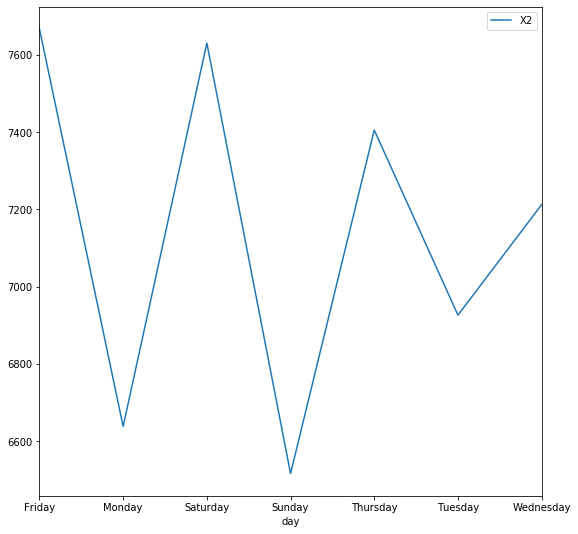

In [207]:
tx_piv.plot(figsize=(9,9))


In [208]:
tx_piv = tx2.pivot_table(index="time_of_day",values="X2",aggfunc="count")

Text(0, 0.5, 'Counts')

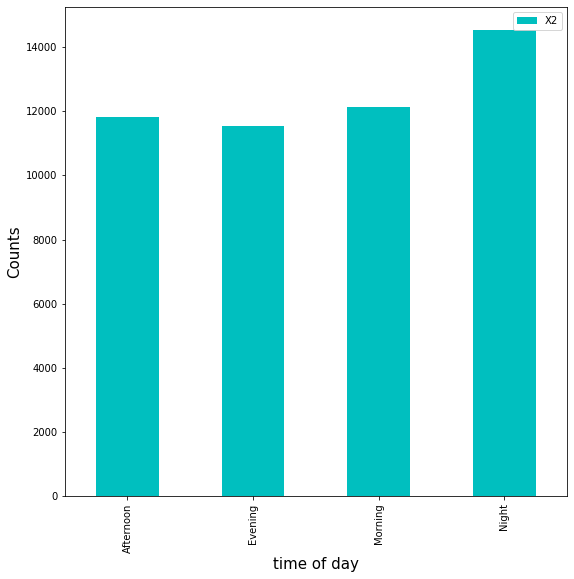

In [209]:
a =tx_piv.plot(kind="bar",color ="c",figsize=(9,9))
a.set_xlabel("time of day",fontsize=15)
a.set_ylabel("Counts", fontsize=15)


In [210]:
# plt.bar(tx2["time_of_day"],tx2["no_of_passenger"])

In [211]:
tx_piv = tx2.pivot_table(index="day",columns="time_of_day",values="day_no",aggfunc="count")

In [212]:
tx_piv

time_of_day,Afternoon,Evening,Morning,Night
day,,,,
Friday,1705,1771,1938,2253
Monday,1645,1664,1802,1527
Saturday,1787,1644,1312,2887
Sunday,1662,1270,1091,2493
Thursday,1661,1762,2006,1976
Tuesday,1712,1698,1927,1589
Wednesday,1643,1735,2042,1792


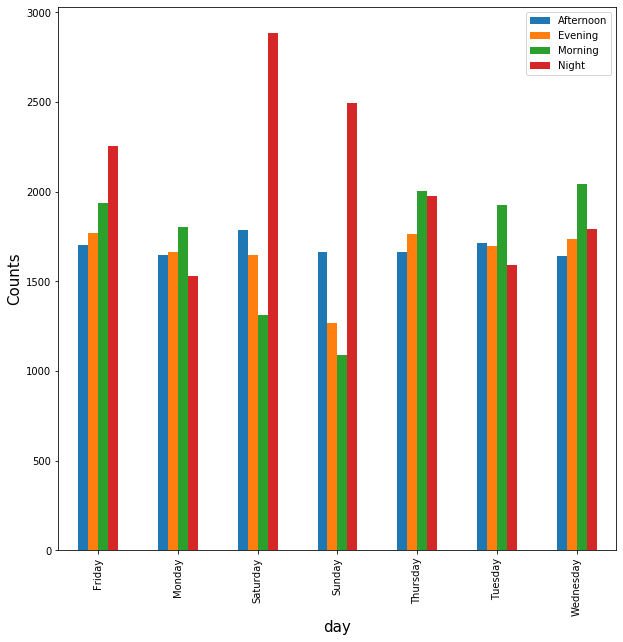

In [213]:
b = tx_piv.plot(kind="bar",figsize=(10,10))
b.set_xlabel("day",fontsize=15)
b.set_ylabel("Counts", fontsize=15)
plt.legend()
plt.show()

In [214]:
tx_piv = tx2.pivot_table(index="time_of_day",values= "no_of_passenger",aggfunc="count")

In [215]:
tx_piv

,no_of_passenger
time_of_day,
Afternoon,11815
Evening,11544
Morning,12118
Night,14517


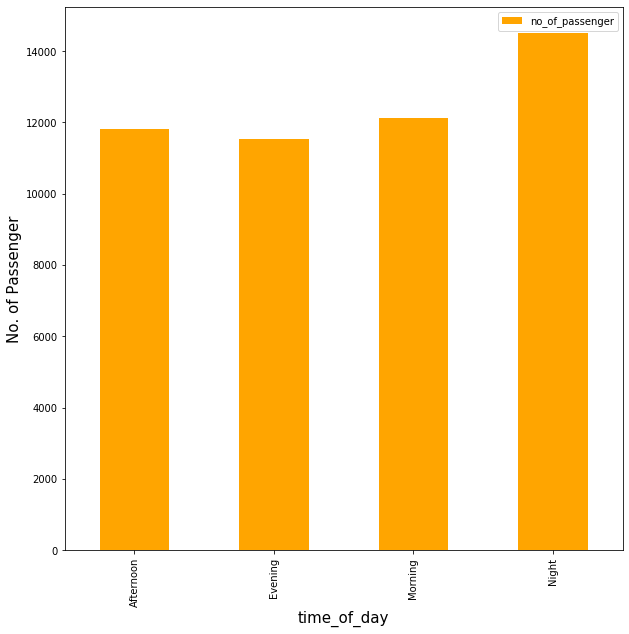

In [216]:
b = tx_piv.plot(kind="bar",figsize=(10,10),color="orange")
b.set_xlabel("time_of_day",fontsize=15)
b.set_ylabel("No. of Passenger", fontsize=15)
plt.legend()
plt.show()

In [217]:
tx_piv = tx2.pivot_table(index="day",values= "Distance_Travel",aggfunc="mean")

In [218]:
tx_piv

,Distance_Travel
day,
Friday,0.033082
Monday,0.035592
Saturday,0.033728
Sunday,0.036213
Thursday,0.033961
Tuesday,0.032867
Wednesday,0.032044


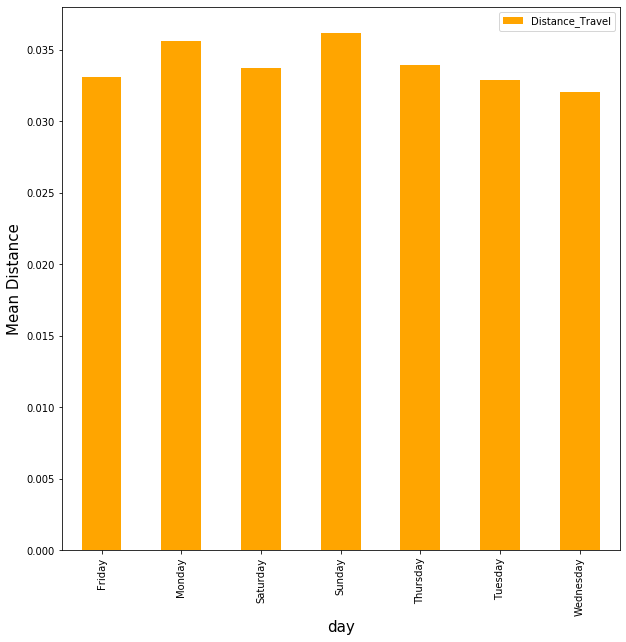

In [219]:
b = tx_piv.plot(kind="bar",figsize=(10,10),color="orange")
b.set_xlabel("day",fontsize=15)
b.set_ylabel("Mean Distance", fontsize=15)
plt.legend()
plt.show()

In [220]:
tx_piv = tx2.pivot_table(index="day",values= "no_of_passenger",aggfunc="count")

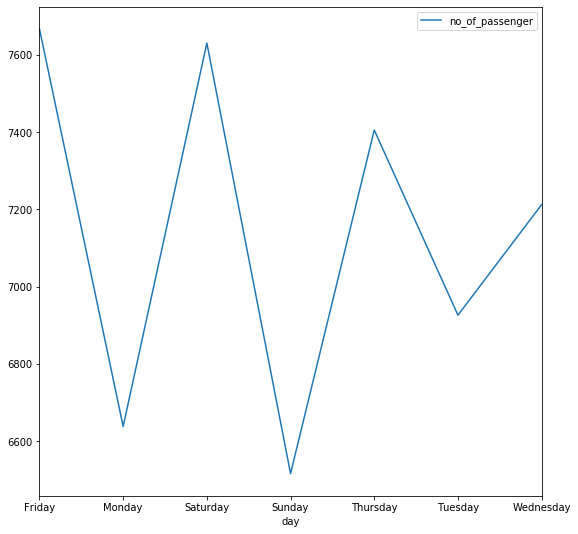

In [221]:
tx_piv.plot(figsize=(9,9))

In [222]:
index_2 = tx2[tx2["amount"]<2.5].index # we dropped it because the charge of taxi in new york can never be less than 2.5

In [223]:
tx2.drop(index_2,inplace=True)

In [224]:
a = tx2.groupby(["amount"]).agg({"amount":"count"})

In [225]:
tx2["amount"].value_counts()

6.50     2468
4.50     2104
8.50     1929
6.10     1441
5.30     1440
5.70     1426
4.90     1397
6.90     1311
10.50    1225
7.30     1172
7.70     1114
5.50     1075
4.10     1069
8.10     1057
7.00     1045
6.00     1022
7.50     1009
8.00      975
5.00      913
8.90      868
9.00      849
12.50     827
9.30      798
9.50      795
9.70      720
3.70      711
10.00     699
10.10     652
11.00     640
52.00     598
         ... 
26.65       1
32.04       1
21.07       1
19.80       1
47.70       1
16.70       1
23.80       1
43.04       1
19.83       1
28.54       1
32.65       1
42.10       1
49.83       1
23.79       1
27.80       1
15.87       1
46.80       1
51.10       1
24.04       1
44.90       1
29.60       1
19.90       1
32.40       1
27.10       1
41.87       1
18.35       1
42.80       1
25.05       1
25.39       1
47.80       1
Name: amount, Length: 548, dtype: int64

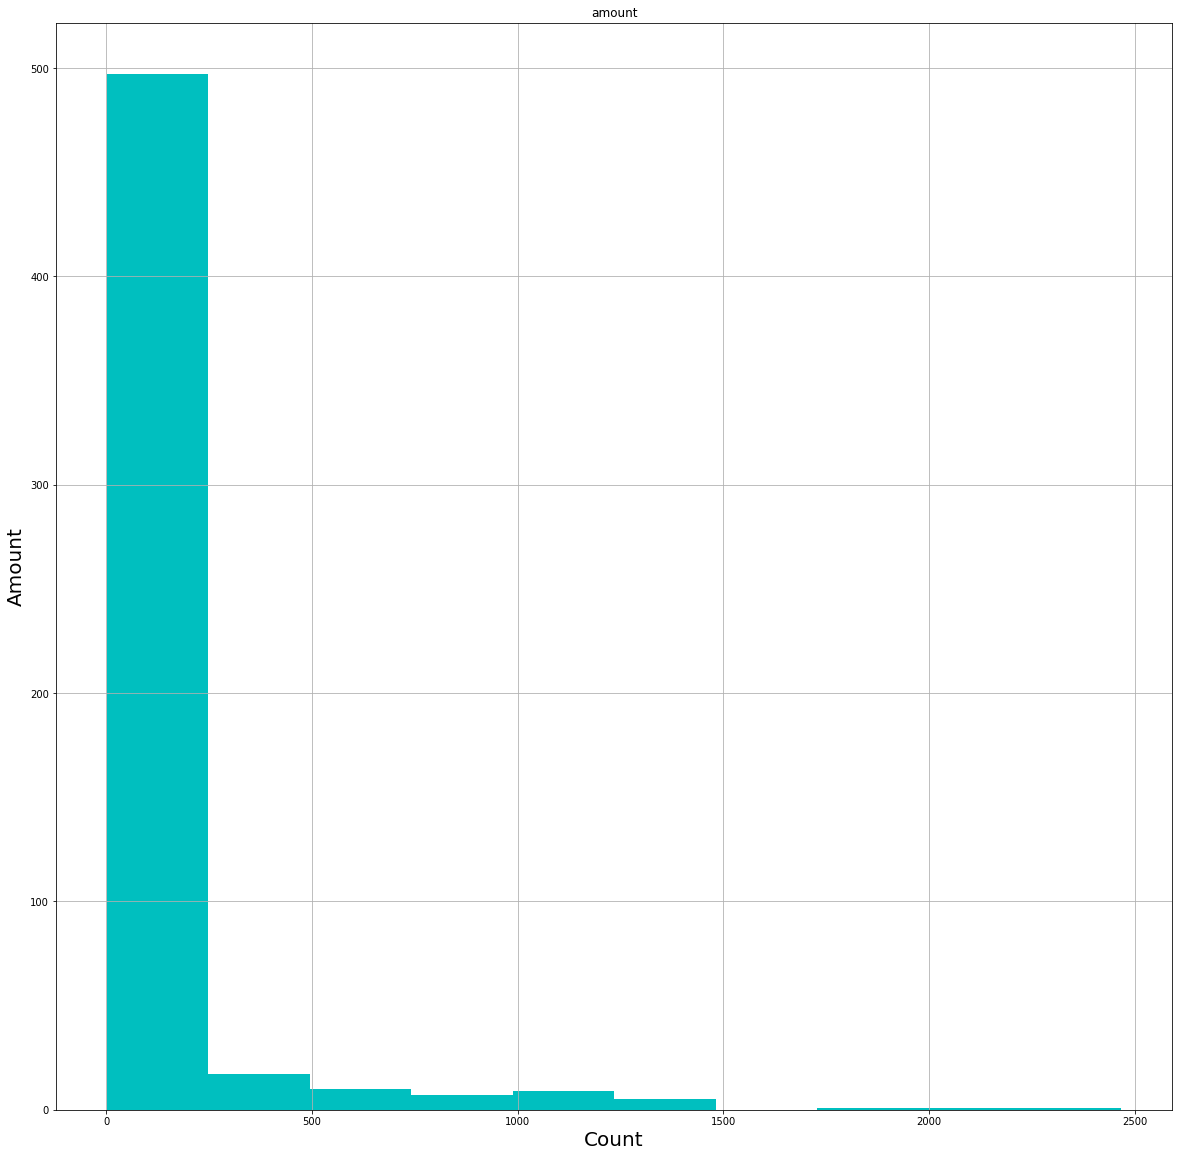

In [226]:
a.hist(figsize=(20,20),color="c")
plt.xlabel("Count",fontsize=20)
plt.ylabel("Amount",fontsize=20)
plt.show()


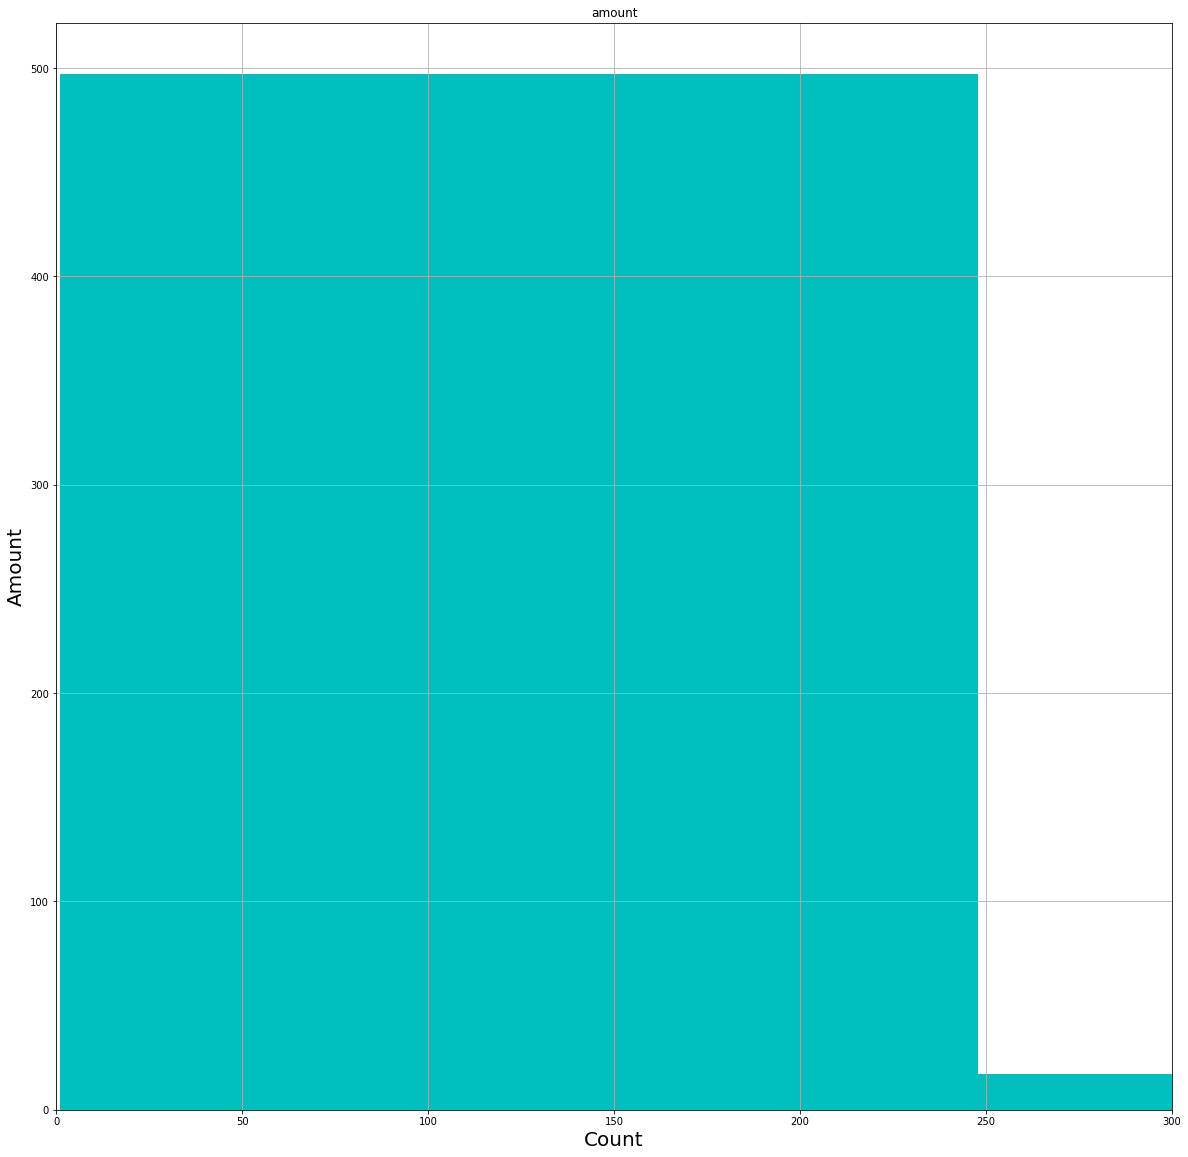

In [227]:
a.hist(figsize=(20,20),color="c")
plt.xlabel("Count",fontsize=20)
plt.ylabel("Amount",fontsize=20)


plt.xlim([0,300])
plt.show()

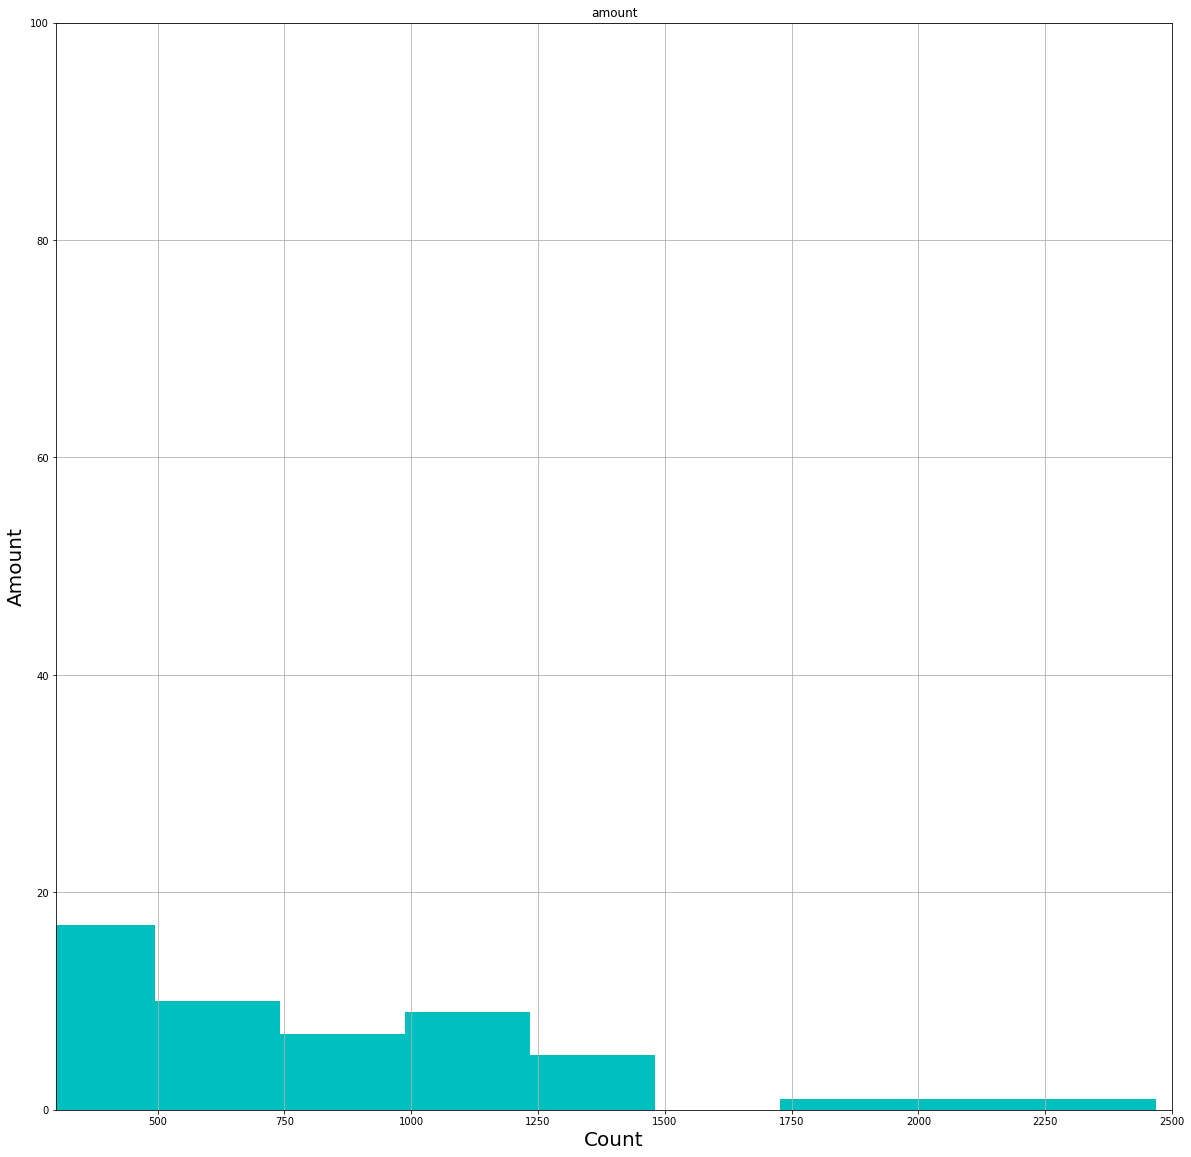

In [228]:
a.hist(figsize=(20,20),color="c")
plt.xlabel("Count",fontsize=20)
plt.ylabel("Amount",fontsize=20)


plt.xlim([300,2500])
plt.ylim([0,100])
plt.show()

In [229]:
tx_amt = tx2["amount"]

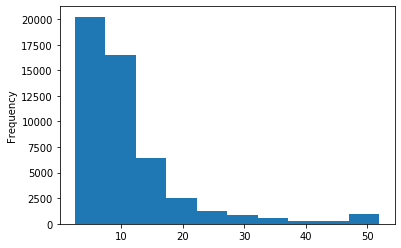

In [230]:
tx_amt.plot(kind="hist")

In [231]:
tx2["no_of_passenger"].value_counts()

1    34799
2     7386
4     5457
3     2183
0      165
Name: no_of_passenger, dtype: int64

In [232]:
tx2.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,49990.0,11.255456,8.975990,2.500000,6.000000,8.500000,12.500000,52.000000
no_of_passenger,49990.0,1.559272,0.997706,0.000000,1.000000,1.000000,2.000000,4.000000
X1,49990.0,39.933598,6.225469,-74.006893,40.734883,40.752679,40.767360,401.083332
X2,49990.0,39.926903,6.012677,-74.006377,40.734375,40.753373,40.768166,43.415190
Y1,49990.0,-72.509468,10.394880,-75.423848,-73.992062,-73.981840,-73.967155,40.783472
Y2,49990.0,-72.505803,10.403539,-84.654241,-73.991152,-73.980082,-73.963588,40.851027
Distance_Travel,49990.0,0.033875,0.039055,0.000000,0.012475,0.021502,0.038681,0.228218
hours,49990.0,13.488918,6.507130,0.000000,9.000000,14.000000,19.000000,23.000000
min,49990.0,29.665113,17.307275,0.000000,15.000000,30.000000,45.000000,59.000000
second,49990.0,15.869934,19.429675,0.000000,0.000000,4.000000,32.000000,59.000000


In [233]:
# Remove latitude and longtiude outliers
tx2 = tx2.loc[tx2['X1'].between(40, 42)]
tx2 = tx2.loc[tx2['Y1'].between(-75, -72)]
tx2 = tx2.loc[tx2['X2'].between(40, 42)]
tx2 = tx2.loc[tx2['Y2'].between(-75, -72)]
print(f'New number of observations: {tx2.shape[0]}')


New number of observations: 48944


In [234]:
tx2.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,48944.0,11.250773,8.957200,2.500000,6.000000,8.500000,12.500000,52.000000
no_of_passenger,48944.0,1.560416,0.998081,0.000000,1.000000,1.000000,2.000000,4.000000
X1,48944.0,40.751123,0.030840,40.121653,40.736520,40.753445,40.767764,41.650000
X2,48944.0,40.751579,0.033586,40.164927,40.735906,40.754120,40.768484,41.543217
Y1,48944.0,-73.975147,0.039726,-74.711648,-73.992300,-73.982120,-73.968397,-72.856968
Y2,48944.0,-73.973989,0.038647,-74.755480,-73.991333,-73.980480,-73.965321,-72.854940
Distance_Travel,48944.0,0.034085,0.038133,0.000000,0.012872,0.021840,0.039053,0.228218
hours,48944.0,13.483634,6.503427,0.000000,9.000000,14.000000,19.000000,23.000000
min,48944.0,29.651234,17.308906,0.000000,15.000000,30.000000,45.000000,59.000000
second,48944.0,15.884909,19.426217,0.000000,0.000000,4.000000,32.000000,59.000000


In [235]:
def minkowski_distance(x1, x2, y1, y2, p):
    return ((abs(x2 - x1) ** p) + (abs(y2 - y1)) ** p) ** (1 / p)


In [236]:
tx2['manhattan_d'] = minkowski_distance(tx2['Y1'], 
                                       tx2['Y2'],
                                       tx2['X1'],
                                       tx2['X2'], 1)


In [237]:
tx2.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,48944.0,11.250773,8.957200,2.500000,6.000000,8.500000,12.500000,52.000000
no_of_passenger,48944.0,1.560416,0.998081,0.000000,1.000000,1.000000,2.000000,4.000000
X1,48944.0,40.751123,0.030840,40.121653,40.736520,40.753445,40.767764,41.650000
X2,48944.0,40.751579,0.033586,40.164927,40.735906,40.754120,40.768484,41.543217
Y1,48944.0,-73.975147,0.039726,-74.711648,-73.992300,-73.982120,-73.968397,-72.856968
Y2,48944.0,-73.973989,0.038647,-74.755480,-73.991333,-73.980480,-73.965321,-72.854940
Distance_Travel,48944.0,0.034085,0.038133,0.000000,0.012872,0.021840,0.039053,0.228218
hours,48944.0,13.483634,6.503427,0.000000,9.000000,14.000000,19.000000,23.000000
min,48944.0,29.651234,17.308906,0.000000,15.000000,30.000000,45.000000,59.000000
second,48944.0,15.884909,19.426217,0.000000,0.000000,4.000000,32.000000,59.000000


In [238]:
# tx2.drop(columns=["Distance_Travel"],inplace=True)

In [239]:
tx2.describe().T

,count,mean,std,min,25%,50%,75%,max
amount,48944.0,11.250773,8.957200,2.500000,6.000000,8.500000,12.500000,52.000000
no_of_passenger,48944.0,1.560416,0.998081,0.000000,1.000000,1.000000,2.000000,4.000000
X1,48944.0,40.751123,0.030840,40.121653,40.736520,40.753445,40.767764,41.650000
X2,48944.0,40.751579,0.033586,40.164927,40.735906,40.754120,40.768484,41.543217
Y1,48944.0,-73.975147,0.039726,-74.711648,-73.992300,-73.982120,-73.968397,-72.856968
Y2,48944.0,-73.973989,0.038647,-74.755480,-73.991333,-73.980480,-73.965321,-72.854940
Distance_Travel,48944.0,0.034085,0.038133,0.000000,0.012872,0.021840,0.039053,0.228218
hours,48944.0,13.483634,6.503427,0.000000,9.000000,14.000000,19.000000,23.000000
min,48944.0,29.651234,17.308906,0.000000,15.000000,30.000000,45.000000,59.000000
second,48944.0,15.884909,19.426217,0.000000,0.000000,4.000000,32.000000,59.000000


In [242]:
y = tx2["amount"]
X = tx2[["no_of_passenger","Distance_Travel","manhattan_d"]]

In [243]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state =88)

In [245]:
rf1 = RandomForestRegressor()
rf1.fit(X_train,y_train)

C:\Users\UTKARSH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [246]:
print("Train R2", rf1.score(X_train,y_train))
print("Test R2",rf1.score(X_test,y_test))

Train R2 0.9451546533497331
Test R2 0.7690732120796677


In [247]:
# def Classification(X1,Y1,X2,Y2):
#     pred_train = rf1.predict(X1)
#     pred_test = rf1.predict(X2)
#     metrics.classification_report

In [248]:
help (rf1)

Help on RandomForestRegressor in module sklearn.ensemble.forest object:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators='warn', criterion='mse', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : integer, optional (d

In [250]:
from sklearn.model_selection import GridSearchCV
# "n_estimators":[20,50,100]
# "criterion":['mse','mae'] 
# "max_depth": [3,5,7] 
# "min_samples_split":[2,4,6] 
# "min_samples_leaf":[2,4,6]

In [251]:
# Additional Variable:
#     Date = Day of Week(0 to 6)
#     day of month
#     week
#     month
#     hour

# Is it weekend (1:yes(0,6),0:no(1-5))
# day of month - it_is_starting of month(1-10)
#                is_it_end of month (20-31)
#                mid_of_month(15,20)
# hour - Morning(4-15),evening(15-19),night(19-4)

In [255]:
tx2.head()

,unique_id,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,Time,Zone,hours,min,second,time_of_day,day,day_no,manhattan_d,year
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17:26:21,UTC,17,26,21,Evening,Monday,0,0.011742,2009
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16:52:16,UTC,16,52,16,Afternoon,Tuesday,1,0.107481,2010
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,00:35:00,UTC,0,35,0,Night,Thursday,3,0.019212,2011
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,04:30:42,UTC,4,30,42,Night,Saturday,5,0.029386,2012
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,07:51:00,UTC,7,51,0,Morning,Tuesday,1,0.027194,2010


In [254]:
tx2["year"] = tx2["date_time_of_pickup"].dt.year

In [257]:
tx2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 5 columns):
unique_id      48944 non-null object
Time           48944 non-null object
Zone           48944 non-null object
time_of_day    48944 non-null object
day            48944 non-null object
dtypes: object(5)
memory usage: 2.2+ MB


In [258]:
tx2.drop(columns=["unique_id","Time","Zone"],inplace =True)

In [268]:
tx2.head()

,amount,date_time_of_pickup,no_of_passenger,X1,X2,Y1,Y2,Distance_Travel,date,hours,min,second,time_of_day,day,day_no,manhattan_d,year,day_of_the_month,Is_Weekend
0,4.5,2009-06-15 17:26:21+00:00,1,40.721319,40.712278,-73.844311,-73.841610,0.009436,2009-06-15,17,26,21,Evening,Monday,0,0.011742,2009,15,1
1,16.9,2010-01-05 16:52:16+00:00,1,40.711303,40.782004,-74.016048,-73.979268,0.079696,2010-01-05,16,52,16,Afternoon,Tuesday,1,0.107481,2010,5,0
2,5.7,2011-08-18 00:35:00+00:00,2,40.761270,40.750562,-73.982738,-73.991242,0.013674,2011-08-18,0,35,0,Night,Thursday,3,0.019212,2011,18,0
3,7.7,2012-04-21 04:30:42+00:00,1,40.733143,40.758092,-73.987130,-73.991567,0.025340,2012-04-21,4,30,42,Night,Saturday,5,0.029386,2012,21,0
4,5.3,2010-03-09 07:51:00+00:00,1,40.768008,40.783762,-73.968095,-73.956655,0.019470,2010-03-09,7,51,0,Morning,Tuesday,1,0.027194,2010,9,0


In [262]:
tx2["day_of_the_month"] = tx2["date_time_of_pickup"].dt.day

In [264]:
tx2.drop(columns=["day_of_the_week"],inplace = True)

In [267]:
tx2["Is_Weekend"] =np.where(tx2["day_no"].isin ([0,6]),1,0)

In [269]:
tx2["Is_starting_of_month"] = np.where(tx2["day_of_the_month"].isin ([1,2,3,4,5,6,7,8,9,10]),1,0)

In [270]:
tx2["Is_middle_of_month"] = np.where(tx2["day_of_the_month"].isin (range(11,21)),1,0)
tx2["Is_end_of_month"] = np.where(tx2["day_of_the_month"].isin (range(21,32)),1,0)

In [273]:
tx2.head().T

,0,1,2,3,4
amount,4.5,16.9,5.7,7.7,5.3
date_time_of_pickup,2009-06-15 17:26:21+00:00,2010-01-05 16:52:16+00:00,2011-08-18 00:35:00+00:00,2012-04-21 04:30:42+00:00,2010-03-09 07:51:00+00:00
no_of_passenger,1,1,2,1,1
X1,40.7213,40.7113,40.7613,40.7331,40.768
X2,40.7123,40.782,40.7506,40.7581,40.7838
Y1,-73.8443,-74.016,-73.9827,-73.9871,-73.9681
Y2,-73.8416,-73.9793,-73.9912,-73.9916,-73.9567
Distance_Travel,0.00943584,0.0796957,0.013674,0.0253405,0.0194695
date,2009-06-15 00:00:00,2010-01-05 00:00:00,2011-08-18 00:00:00,2012-04-21 00:00:00,2010-03-09 00:00:00
hours,17,16,0,4,7


In [272]:
tx2.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 2 columns):
time_of_day    48944 non-null object
day            48944 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


In [275]:
tx3 = pd.get_dummies(tx2,columns=["time_of_day","day"])

In [277]:
tx3.head().T

,0,1,2,3,4
amount,4.5,16.9,5.7,7.7,5.3
date_time_of_pickup,2009-06-15 17:26:21+00:00,2010-01-05 16:52:16+00:00,2011-08-18 00:35:00+00:00,2012-04-21 04:30:42+00:00,2010-03-09 07:51:00+00:00
no_of_passenger,1,1,2,1,1
X1,40.7213,40.7113,40.7613,40.7331,40.768
X2,40.7123,40.782,40.7506,40.7581,40.7838
Y1,-73.8443,-74.016,-73.9827,-73.9871,-73.9681
Y2,-73.8416,-73.9793,-73.9912,-73.9916,-73.9567
Distance_Travel,0.00943584,0.0796957,0.013674,0.0253405,0.0194695
date,2009-06-15 00:00:00,2010-01-05 00:00:00,2011-08-18 00:00:00,2012-04-21 00:00:00,2010-03-09 00:00:00
hours,17,16,0,4,7


In [278]:
tx3["year"].value_counts()

2012    7812
2013    7666
2011    7624
2009    7611
2010    7458
2014    7390
2015    3383
Name: year, dtype: int64

In [282]:
tx3["Is_leap_year"] = np.where((tx3["year"]%4 == 0),1,0)

In [283]:
tx3.head().T

,0,1,2,3,4
amount,4.5,16.9,5.7,7.7,5.3
date_time_of_pickup,2009-06-15 17:26:21+00:00,2010-01-05 16:52:16+00:00,2011-08-18 00:35:00+00:00,2012-04-21 04:30:42+00:00,2010-03-09 07:51:00+00:00
no_of_passenger,1,1,2,1,1
X1,40.7213,40.7113,40.7613,40.7331,40.768
X2,40.7123,40.782,40.7506,40.7581,40.7838
Y1,-73.8443,-74.016,-73.9827,-73.9871,-73.9681
Y2,-73.8416,-73.9793,-73.9912,-73.9916,-73.9567
Distance_Travel,0.00943584,0.0796957,0.013674,0.0253405,0.0194695
date,2009-06-15 00:00:00,2010-01-05 00:00:00,2011-08-18 00:00:00,2012-04-21 00:00:00,2010-03-09 00:00:00
hours,17,16,0,4,7


In [284]:
tx4 = tx3.drop(columns=["date","min","second","date_time_of_pickup","X1","X2","Y1","Y2"])

In [285]:
tx4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48944 entries, 0 to 49999
Data columns (total 24 columns):
amount                   48944 non-null float64
no_of_passenger          48944 non-null int64
Distance_Travel          48944 non-null float64
hours                    48944 non-null int64
day_no                   48944 non-null int64
manhattan_d              48944 non-null float64
year                     48944 non-null int64
day_of_the_month         48944 non-null int64
Is_Weekend               48944 non-null int32
Is_starting_of_month     48944 non-null int32
Is_middle_of_month       48944 non-null int32
Is_end_of_month          48944 non-null int32
time_of_day_Afternoon    48944 non-null uint8
time_of_day_Evening      48944 non-null uint8
time_of_day_Morning      48944 non-null uint8
time_of_day_Night        48944 non-null uint8
day_Friday               48944 non-null uint8
day_Monday               48944 non-null uint8
day_Saturday             48944 non-null uint8
day_Sunday 

In [286]:
y = tx4["amount"]
X = tx4.drop(columns=["amount"])

In [287]:
X_train,X_test,y_train,y_test =train_test_split(X,y, test_size = 0.2 , random_state = 1)

In [288]:
rf2 = RandomForestRegressor()

In [289]:
rf2.fit(X_train,y_train)

C:\Users\UTKARSH\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [290]:
print("Train R2", rf2.score(X_train,y_train))
print("Test R2",rf2.score(X_test,y_test))

Train R2 0.9664825692871086
Test R2 0.7975645104098009


In [ ]:
from sklearn.model_selection import GridSearchCV
param = {"n_estimators":[20,50],"criterion":['mse','mae'] ,"max_depth": [3,5,7],"min_samples_split":[2,4,6],
                "min_samples_leaf":[2,4,6]}

rf3 = RandomForestRegressor()
Grid_search = GridSearchCV(estimator = rf3, param_grid=param,cv=5,verbose=1,n_jobs=-1)
Grid_search.fit(X_train,y_train)
